# Exploratory Data Analysis

### 8. Load the Titanic dataset and perform univariate and bivariate analysis on numerical and categorical features.

In [119]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [120]:
df = sns.load_dataset('titanic')

In [121]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [122]:
df.isnull().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

In [123]:
list(df.columns)

['survived',
 'pclass',
 'sex',
 'age',
 'sibsp',
 'parch',
 'fare',
 'embarked',
 'class',
 'who',
 'adult_male',
 'deck',
 'embark_town',
 'alive',
 'alone']

In [124]:
df.describe()

,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [125]:
num_df = df.select_dtypes(include=['int64','float64'])
cat_df = df.select_dtypes(exclude=['int64','float64'])
num_cols = list(num_df.columns)
cat_cols = list(cat_df.columns)


In [126]:
num_cols

['survived', 'pclass', 'age', 'sibsp', 'parch', 'fare']

In [127]:
cat_cols

['sex',
 'embarked',
 'class',
 'who',
 'adult_male',
 'deck',
 'embark_town',
 'alive',
 'alone']

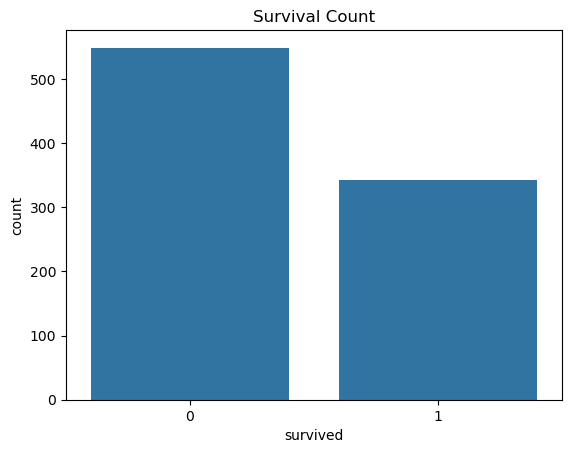

In [128]:
sns.countplot(x='survived', data=df)
plt.title('Survival Count')
plt.show()


In [129]:
num_df.head()

,survived,pclass,age,sibsp,parch,fare
0,0,3,22.0,1,0,7.2500
1,1,1,38.0,1,0,71.2833
2,1,3,26.0,0,0,7.9250
3,1,1,35.0,1,0,53.1000
4,0,3,35.0,0,0,8.0500


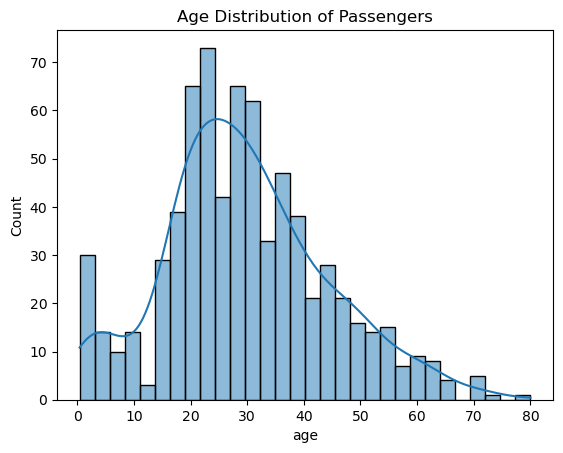

In [130]:
sns.histplot(df['age'].dropna(), kde=True, bins=30)
plt.title('Age Distribution of Passengers')
plt.show()


In [131]:
survived_df = df[df['survived']==1]
# sns.histplot(survived_df['age'].dropna(), kde=True, bins=30)
# plt.title('Age Distribution of Passengers')
# plt.show()
survived_df.shape

(342, 15)

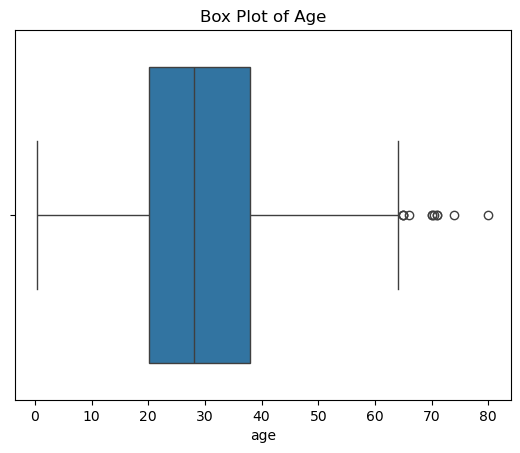

In [132]:
sns.boxplot(x=df['age'])
plt.title('Box Plot of Age')
plt.show()


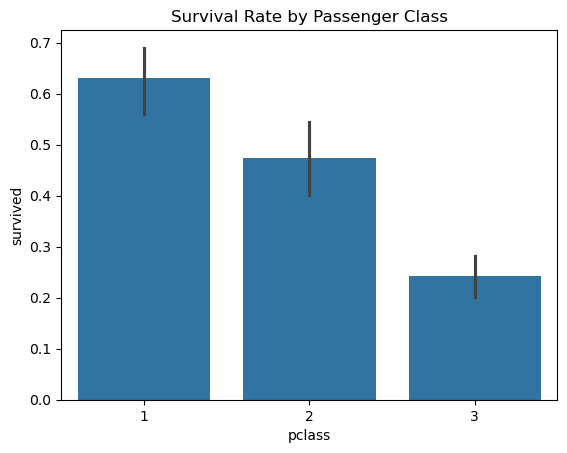

In [133]:
sns.barplot(x='pclass', y='survived', data=df)
plt.title('Survival Rate by Passenger Class')
plt.show()


In [134]:
age_cols_to_bin = df['age']
df['age_bins'] = pd.cut(df['age'],bins=4,labels=['child','young','old','pair_kabr_me hain'])
df['age_bins'].value_counts()

age_bins
young                385
child                179
old                  128
pair_kabr_me hain     22
Name: count, dtype: int64

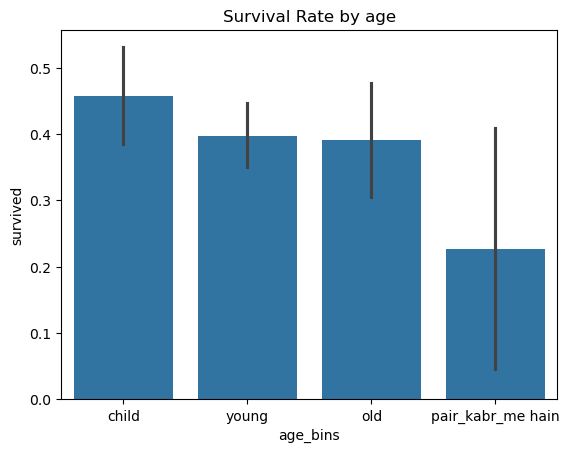

In [135]:
sns.barplot(x='age_bins', y='survived', data=df)
plt.title('Survival Rate by age')
plt.show()

In [136]:
survived_df['age_bins'] = pd.cut(survived_df['age'],bins=4,labels=['child','young','old','pair_kabr_me_hain'])
survived_df['age_bins'].value_counts()

C:\Users\RRC\AppData\Local\Temp\ipykernel_3468\2732445697.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  survived_df['age_bins'] = pd.cut(survived_df['age'],bins=4,labels=['child','young','old','pair_kabr_me_hain'])


age_bins
young                153
child                 82
old                   50
pair_kabr_me_hain      5
Name: count, dtype: int64

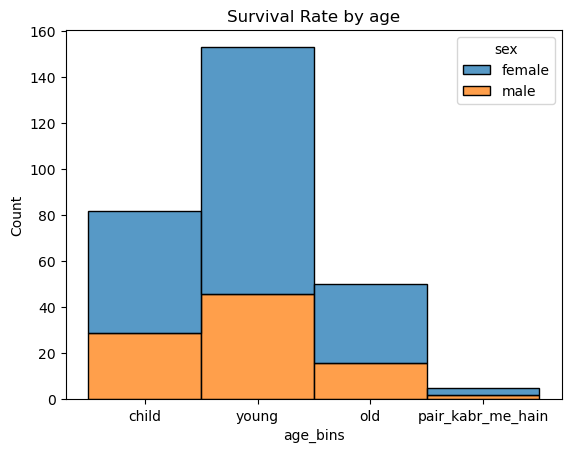

In [137]:
sns.histplot(x=survived_df['age_bins'], data=survived_df, hue = 'sex',multiple = 'stack')
plt.title('Survival Rate by age')
plt.show()

In [138]:
survived_df['age_bins'].value_counts()

age_bins
young                153
child                 82
old                   50
pair_kabr_me_hain      5
Name: count, dtype: int64

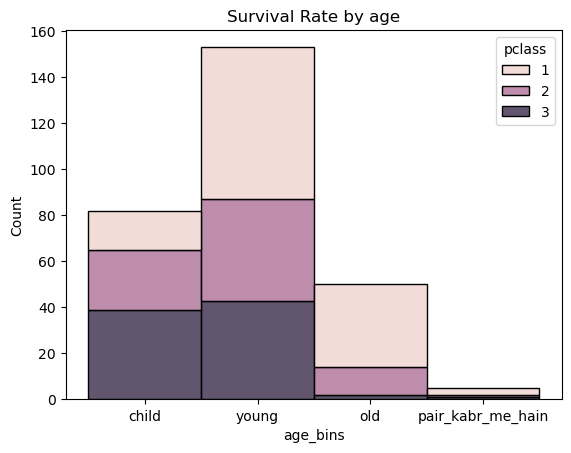

In [139]:
sns.histplot(x=survived_df['age_bins'], data=survived_df, hue = 'pclass',multiple = 'stack')
plt.title('Survival Rate by age')
plt.show()

In [140]:
young = survived_df[survived_df['age_bins']=='young']
young.shape
young['pclass'].value_counts()


pclass
1    66
2    44
3    43
Name: count, dtype: int64

In [141]:
child = survived_df[survived_df['age_bins']=='child']
child.shape
child['pclass'].value_counts()

pclass
3    39
2    26
1    17
Name: count, dtype: int64

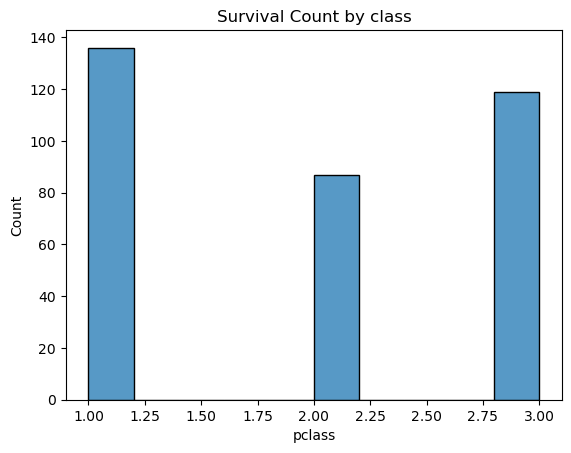

In [142]:
sns.histplot(x=survived_df['pclass'], data=survived_df)
plt.title('Survival Count by class')
plt.show()

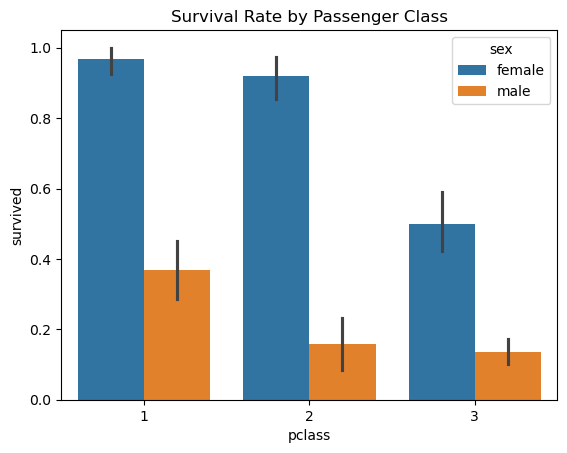

In [143]:
sns.barplot(x='pclass', y='survived', data=df,hue = 'sex')
plt.title('Survival Rate by Passenger Class')
plt.show()

### 9. Identify and visualize outliers using boxplots and z-score analysis.

In [146]:


# Using Z-Score detect Outlier 
# Sample data = [10,12,11,13,100,12,11,13] where z>3

data = pd.Series([10,12,11,13,100,12,11,13])
data


0     10
1     12
2     11
3     13
4    100
5     12
6     11
7     13
dtype: int64

In [153]:
data = [10, 12, 11, 13, 100, 12, 11, 13]

mean = np.mean(data)
std_dev = np.std(data)

z_scores = [(x - mean) / std_dev for x in data]

outliers = [data[i] for i in range(len(z_scores)) if abs(z_scores[i]) > 3]

print("Z-scores:", np.array(z_scores))
print("Outliers:", outliers)


Z-scores: [-0.43643978 -0.36797863 -0.40220921 -0.33374806  2.64431158 -0.36797863
 -0.40220921 -0.33374806]
Outliers: []


### 10. Display the correlation matrix and visually interpret relationships using seaborn.heatmap().




In [155]:
iris_df = sns.load_dataset('iris')
iris_df.head(

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


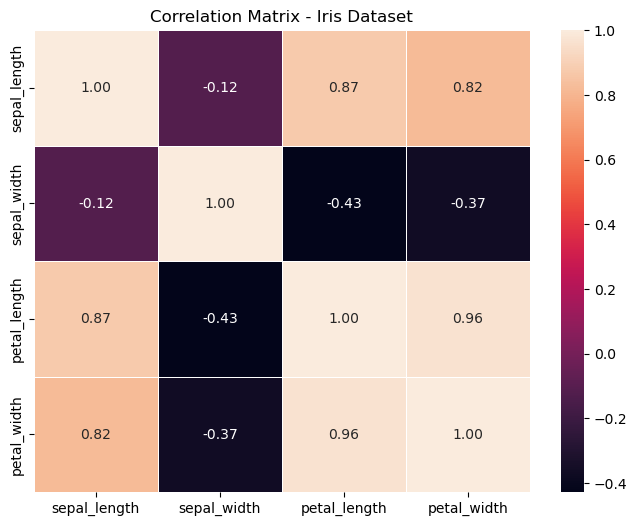

In [159]:
correlation_matrix = iris_df.corr(numeric_only=True)

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, linewidths=0.5, fmt=".2f")
plt.title("Correlation Matrix - Iris Dataset")
plt.show()


### 11. Compute and interpret mean, median, mode, variance, and standard deviation for a given dataset.

In [160]:
data = pd.Series([10,12,100,13,11,12,11,13])
print("Mean:",data.mean(),"median:",data.median(),"mode:",data.mode(),"Var:",data.std()**2,"Std:",data.std())

Mean: 22.75 median: 12.0 mode: 0    11
1    12
2    13
dtype: int64 Var: 975.3571428571429 Std: 31.230708331018413


# 12. Load a dataset with missing values. Demonstrate imputation using mean, median, and mode techniques.

In [164]:
dg=pd.DataFrame([2,6,1,10,12,np.nan,np.nan])
mean_val=dg.mean()
print(mean_val)
dg.fillna(mean_val,inplace=True)
dg.value_counts()

0    6.2
dtype: float64


0   
6.2     2
1.0     1
2.0     1
6.0     1
10.0    1
12.0    1
Name: count, dtype: int64

# 13. Write a custom function that removes rows where more than 30% of data is missing.

In [163]:
def remove_rows(df, threshold=0.3):   
    max_missing = int(threshold * df.shape[1])
    cleaned_df = df[df.isnull().sum(axis=1) <= max_missing]    
    return cleaned_df
